In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

In [2]:
def show_tensor_images(image_tensor, num_images=1, size=(1, 256, 512)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_shifted = image_tensor
    image_unflat = image_shifted.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [13]:
data_dir ='./dataset/'

trainTransforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

trainDataset = ImageFolder(os.path.join(data_dir,'train/'), transform = trainTransforms)
trainDataloader = DataLoader(train_dataset, batch_size=16,shuffle=True)

RuntimeError: Found 0 files in subfolders of: ./dataset/train/
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp

Path: ./dataset/train/
./dataset/train/Sbc2b21110180.jpg
Shape tensor: torch.Size([1, 256, 512])


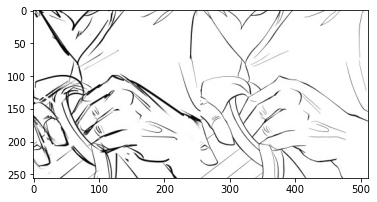

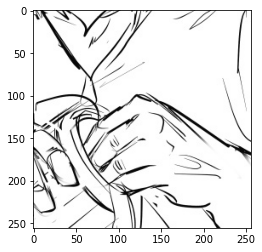

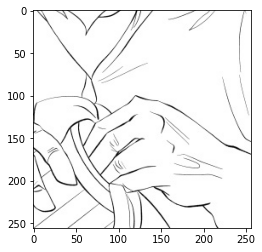

In [12]:
#'''
img_names = []

path = os.path.join(data_dir,'train/')

print('Path:',path)

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+img)
        #print(img_names)

pic = 10

img_test = Image.open(img_names[pic])
print(img_names[pic])

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

im = transform(img_test)

print('Shape tensor:', im.shape)

im_width =  im.shape[2]

im_input  = im[:, :, :im_width // 2]
im_output = im[:, :, im_width // 2:]

show_tensor_images(im,)

show_tensor_images(im_input,1,(1, 256, 256))
show_tensor_images(im_output,1,(1, 256, 256))
#'''